<a href="https://colab.research.google.com/github/Jeongbin-Heo/AI_12_Section2_Project/blob/main/Project2_220321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pdpbox

In [ ]:
!pip install shap

In [ ]:
!pip install --upgrade category_encoders

In [ ]:
!pip install -U pandas-profiling

In [ ]:
!pip install eli5

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*   Company- String - 노트북 제조 회사
*   Product -String - 노트북 제조 회사
*   TypeName -String - 타입 (노트북, 울트라북, 게이밍, etc.)
*   Inches -Numeric- 화면 사이즈(인치)
*   ScreenResolution -String- 해상도
*   Cpu- String - CPU
*   Ram -String - 램
*   Memory -String- 메모리 용량
*   GPU -String- GPU
*   OpSys -String- OS(맥, 윈도우)
*   Weight -String- 무게
*   Price_euros -Numeric- 가격(단위 : Euro)


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/AIB/Section2/laptop_price.csv', encoding = 'ISO-8859-1')
df = df.rename(columns = {'Price_euros' : 'Price'})

df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [2]:
# laptop_ID는 삭제
df = df.drop(columns = 'laptop_ID')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 평가지표 및 기준모델 선정


*   평가지표 : R2 Score
*   기준 모델 : Price_euros의 평균값



In [3]:
from sklearn.metrics import r2_score

price = df['Price']
mean = df['Price'].mean()
baseline = [mean] * len(df)

print('기준모델의 r2 Score :', r2_score(price, baseline))

기준모델의 r2 Score : 2.220446049250313e-16


# 데이터 전처리

In [4]:
##### ProfileReport로 확인
# 결측치 처리
df.isnull().sum() 
# 결측치는 존재하지 않으므로 결측치를 처리하는 과정은 생략

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
##### ProfileReport로 확인
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [6]:
##### ProfileReport로 확인
# 범주형 데이터의 cardinality를 확인
df.select_dtypes(exclude = ['float64', 'int64']).describe()
# Product의 cardinality가 너무 높으므로 삭제, 나머지도 조정이 필요함

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [7]:
# Product는 cardinality가 너무 높으므로 삭제
df = df.drop(columns = 'Product')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Screen Resolution 처리**

In [8]:
df['ScreenResolution'].value_counts()
# IPS Panel Retina Display, IPS Panel, normal과 같은 스크린 타입(Screen Type)
# 1920x1080과 같은 해상도 -> 픽셀수(Pixel)
# 터치스크린(TouchScreen) 유무

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Screen Type이라는 새로운 feature 생성


*   IPS Panel Retina Display, IPS Panel, 그리고 일반으로 나눌 수 있음





In [9]:
df['Screen Type'] = df['ScreenResolution']

def stype(x) :
  if 'IPS Panel Retina Display' in x :
    return 'IPS Panel Retina Display'
  elif 'IPS Panel' in x :
    return 'IPS Panel'
  else :
    return 'Normal'

df['Screen Type'] = df['Screen Type'].apply(stype)

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Screen Type', 
          'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

df.head()

,Company,TypeName,Inches,ScreenResolution,Screen Type,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Normal,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Normal,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


터치스크린의 유무를 나타내는 Touchscreen이라는 새로운 feature 생성

*   있으면 1, 없으면 0



In [10]:
df['Touchscreen'] = df['ScreenResolution']

def touch(x) :
  if 'Touchscreen' in x :
    return 1
  else :
    return 0

df['Touchscreen'] = df['Touchscreen'].apply(touch)

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Screen Type', 'Touchscreen',
         'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

df.head()

,Company,TypeName,Inches,ScreenResolution,Screen Type,Touchscreen,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,0,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Normal,0,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Normal,0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,0,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,0,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


해상도의 가로x세로를 곱해서 Pixel(픽셀 수)이라는 새로운 feature 생성

*   ex) 1920x1080 -> 2073600





In [11]:
df['Pixel'] = df['ScreenResolution']

def px(x) : 
  if x[-5] == 'x' :
    w = int(x[-9:-5])
    h = int(x[-4:])
  else : 
    w = int(x[-8:-4])
    h = int(x[-3:])
  
  return w * h 

df['Pixel'] = df['Pixel'].apply(px)

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Screen Type', 'Touchscreen',
         'Pixel', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

df.head()

,Company,TypeName,Inches,ScreenResolution,Screen Type,Touchscreen,Pixel,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,0,4096000,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Normal,0,1296000,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Normal,0,2073600,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,0,5184000,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,0,4096000,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


'ScreenResolution'은 삭제

In [12]:
df = df.drop(columns = 'ScreenResolution')

df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Cpu 처리**

In [13]:
df['Cpu'].unique()
# 크게 제조사로는 Intel, AMD가 있다
# Cpu 모델 뒤에 속도를 나타내는 GHz가 있다

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

Cpu GHz라는 새로운 feature 생성

In [14]:
df['Cpu GHz'] = df['Cpu']

def ghz(x):
  if '.' in x :
    return x[-7:]
  else :
    return x[-5:]

def tofloat(x):
  if ' ' in x :
    x = x.replace(' ', '')
    x = x.replace('GHz', '')
    return float(x)
  else :
    x = x.replace('GHz', '')
    return float(x)

df['Cpu GHz'] = df['Cpu GHz'].apply(ghz).apply(tofloat)

df = df[['Company', 'TypeName', 'Inches', 'Screen Type', 'Touchscreen',
         'Pixel', 'Cpu', 'Cpu GHz', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]

df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5 2.3GHz,2.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5 1.8GHz,1.8,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U 2.5GHz,2.5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7 2.7GHz,2.7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5 3.1GHz,3.1,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Cpu에서 속도(GHz)를 삭제하고 모델명만 기재

In [39]:
def cpu(x) :
  list = x.split(' ')[:-1]
  answer = ' '.join(list)
  return answer

df['Cpu'] = df['Cpu'].apply(cpu)

df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U,2.5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Cpu 종류를 확인하기 위해 Intel, AMD, 기타 회사의 종류를 확인

In [ ]:
# # Intel Cpu 종류 확인
# Intel = df[df['Cpu'].str.contains('Intel')]
# Intel['Cpu'].unique()
# # Intel은 Intel Core i3, Intel Core i5, Intel Core i7, 
# # Intel Pentium, Intel Atom, Intel Celeron, Intel Xeon

In [ ]:
# # AMD Cpu 종류 확인
# AMD = df[df['Cpu'].str.contains('AMD')]
# AMD['Cpu'].unique()
# # AMD는 AMD E-Series, AMD Ryzen, AMD FX,
# # AMD A4-Series, AMD A6-Series, AMD A8-Series, AMD A9-Series, AMD A10-Series, AMD A12-Series

In [ ]:
# # Intel과 AMD가 아닌 기타 종류 확인
# NoIntel = df[~df['Cpu'].str.contains('Intel')]
# Others = NoIntel[~NoIntel['Cpu'].str.contains('AMD')]
# Others['Cpu'].unique()
# # Samsung Cortex 하나뿐

Cpu에서 모델명만 추출

In [ ]:
# list = ['Intel Pentium', 'Intel Atom', 'Intel Celeron', 'Intel Xeon',
#         'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
#         'AMD E-Series', 'AMD Ryzen', 'AMD FX', 'A4-Series', 'AMD A6-Series',
#         'AMD A8-Series', 'AMD A9-Series', 'AMD A10-Series', 'AMD A12-Series',
#         'Samsung Cortex']

# def cpu(x) :
#   for i in list :
#     while i in x :
#       return i

# df['Cpu'] = df['Cpu'].apply(cpu)

# df.head()

**Ram 처리**

GB 지우고 정수형으로 출력

In [40]:
def ram(x) :
  return int(x.replace('GB', ''))

df['Ram'] = df['Ram'].apply(ram)
df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Memory 처리**

In [41]:
df['Memory'].unique()
# 타입은 SSD, HDD, Flash Storage, Hybrid

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

Memory Size라는 feature를 새로 생성

In [42]:
# df2 = df.copy()
df['Memory Size'] = df['Memory']

# 1.0TB와 같이 표시되어 있는 값을 1TB와 같이변환
def transform(x) :
  if '.0' in x :
    return x.replace('.0', '')
  else :
    return x

# GB와 TB(1000TB)의 단위를 통일
def gb(x) : 
  if 'GB' in x :
    return x.replace('GB', '')
  else :
    return x

def tb(x) : 
  if 'TB' in x :
    return x.replace('TB', '000')
  else :
    return x

# 최종적으로 총 메모리 용량의 합계를 계산
def delete(x) : 
  import re
  x = re.sub(r'[a-zA-Z]', '', x) # 알파벳을 모두 삭제
  x = x.replace(' ', '') # 공백을 삭제
  if '+' in x :
    a, b = x.split('+')
    return int(a) + int(b)
  else : 
    return int(x)

df['Memory Size'] = df['Memory Size'].apply(transform).apply(gb).apply(tb).apply(delete)

df = df[['Company', 'TypeName', 'Inches', 'Screen Type', 'Touchscreen', 'Pixel',
       'Cpu', 'Cpu GHz', 'Ram', 'Memory', 'Memory Size', 'Gpu', 'OpSys', 'Weight', 'Price']]

df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory,Memory Size,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128GB SSD,128,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128GB Flash Storage,128,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U,2.5,8,256GB SSD,256,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512GB SSD,512,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256GB SSD,256,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Memory Type이라는 새로운 feature 생성

In [43]:
# 타입은 SSD, HDD, Flash Storage, Hybrid

df['Memory Type'] = df['Memory']

def memorytype(x) :
  if '+' in x :
    a, b = x.split('+')

    if 'SSD' in a :
      a =  'SSD'
    elif 'HDD' in a :
      a = 'HDD'
    elif 'Flash Storage' in a :
      a = 'Flash Storage'
    elif 'Hybrid' in a :
      a = 'Hybrid'
    else :
      a = 'Others'
    
    if 'SSD' in b :
      b = 'SSD'
    elif 'HDD' in b :
      b = 'HDD'
    elif 'Flash Storage' in b :
      b = 'Flash Storage'
    elif 'Hybrid' in b :
      b = 'Hybrid'
    else :
      b = 'Others'

    return a + '+' + b

  else : 
    if 'SSD' in x :
      return 'SSD'
    elif 'HDD' in x :
      return 'HDD'
    elif 'Flash Storage' in x :
      return 'Flash Storage'
    elif 'Hybrid' in x :
      return 'Hybrid'
    else :
      return 'Others'


df['Memory Type'] = df['Memory Type'].apply(memorytype)

# 'SSD+SSD', 'HDD+HDD' 같은 컬럼을 'SDD', 'HDD'로 변경
def combine(x) :
  if x == 'SSD+SSD' :
    return 'SSD'
  elif x == 'HDD+HDD' :
    return 'HDD'
  else :
    return x


df['Memory Type'] = df['Memory Type'].apply(combine)



df = df[['Company', 'TypeName', 'Inches', 'Screen Type', 'Touchscreen', 'Pixel', 'Cpu', 'Cpu GHz',
       'Ram', 'Memory', 'Memory Size', 'Memory Type', 'Gpu', 'OpSys', 'Weight', 'Price']]

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory,Memory Size,Memory Type,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128GB SSD,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128GB Flash Storage,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U,2.5,8,256GB SSD,256,SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512GB SSD,512,SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256GB SSD,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Memory는 삭제

In [44]:
df = df.drop(columns = 'Memory')

df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U,2.5,8,256,SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512,SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Gpu 처리**

In [ ]:
# df['Gpu'].unique()
# # 크게 제조사로는 Intel, AMD, Nvidia

Gpu 종류를 확인하기 위해 Intel, AMD, Nvidia, 기타 회사의 종류를 확인

In [ ]:
# Intel = df[df['Gpu'].str.contains('Intel')]
# Intel['Gpu'].unique()

# # 'Intel Iris Plus Graphics', 'Intel HD Graphics', 'Intel Iris Pro Graphics', 
# # 'Intel UHD Graphics', 'Intel Iris Graphics', 'Intel Graphics'

In [ ]:
# AMD = df[df['Gpu'].str.contains('AMD')]
# AMD['Gpu'].unique()
# 'AMD Radeon Pro', ''

In [ ]:
# Nvidia = df[df['Gpu'].str.contains('Nvidia')]
# Nvidia['Gpu'].unique()

Gpu 생산 브랜드로 데이터를 변환

In [27]:
# def gpu(x) :
#   if 'Intel' in x :
#     return 'Intel'
#   elif 'Nvidia' in x :
#     return 'Nvidia'
#   elif 'AMD' in x :
#     return 'AMD'
#   else :
#     return 'Others'

# df['Gpu'] = df['Gpu'].apply(gpu)

# df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128,SSD,Intel,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128,Flash Storage,Intel,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5,2.5,8,256,SSD,Intel,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512,SSD,AMD,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256,SSD,Intel,macOS,1.37kg,1803.60


**OpSys 처리**

In [46]:
df['OpSys'].unique()
# cardinality가 적어서 크게 이용할 것이 없어보임

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

**Weight 처리**

kg을 없애고 float로 변환

In [47]:
def tofloat2(x) : 
  return float(x.replace('kg', ''))

df = df.copy()
df['Weight'] = df['Weight'].apply(tofloat2)

df.head()

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5 7200U,2.5,8,256,SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512,SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# EDA

**각 특성별로 가격에 영향이 얼마나 있는지 확인**

*   categorical은 barplot
*   numeric은 heatmap으로 상관관계 확인


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Company

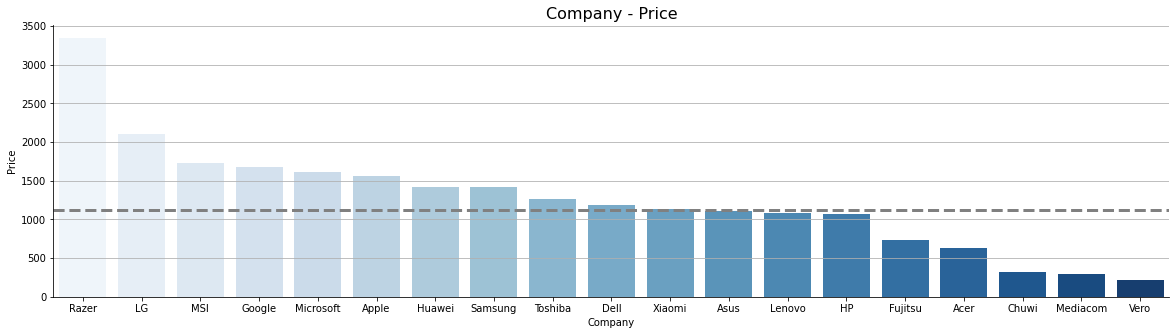

In [49]:
company = pd.DataFrame(df.groupby('Company')['Price'].mean()).reset_index().sort_values('Price', ascending = False)

plt.figure(figsize = (20, 5))
sns.barplot(x = 'Company', y= 'Price', data = company, palette = 'Blues')

plt.title('Company - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

2. TypeName

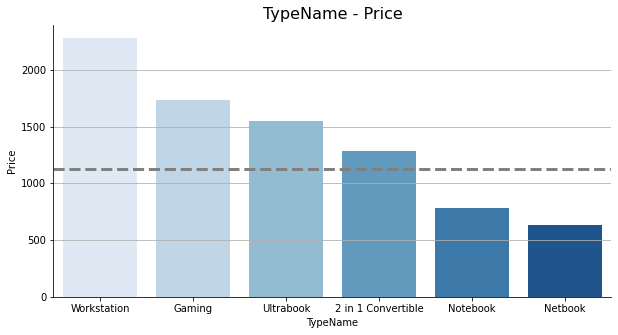

In [50]:
type = pd.DataFrame(df.groupby('TypeName')['Price'].mean()).reset_index().sort_values('Price', ascending = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'TypeName', y = 'Price', data = type, palette = 'Blues')

plt.title('TypeName - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

3. Inches

In [ ]:
# inch = df.loc[:, ['Inches', 'Price']]

# plt.figure(figsize = (10, 5))
# sns.scatterplot(x = 'Inches', y = 'Price', data = inch, color = 'yellowgreen')

# plt.title('Inches - Price', fontdict = {'fontsize' : 16})
# plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
# plt.gca().spines['right'].set_visible(False) 
# plt.gca().spines['top'].set_visible(False)
# plt.grid(True, axis = 'y')

In [35]:
df

,Company,TypeName,Inches,Screen Type,Touchscreen,Pixel,Cpu,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,2.3,8,128,SSD,Intel,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,Normal,0,1296000,Intel Core i5,1.8,8,128,Flash Storage,Intel,macOS,1.34,898.94
2,HP,Notebook,15.6,Normal,0,2073600,Intel Core i5,2.5,8,256,SSD,Intel,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,0,5184000,Intel Core i7,2.7,16,512,SSD,AMD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,0,4096000,Intel Core i5,3.1,8,256,SSD,Intel,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel,1,2073600,Intel Core i7,2.5,4,128,SSD,Intel,Windows 10,1.80,638.00
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel,1,5760000,Intel Core i7,2.5,16,512,SSD,Intel,Windows 10,1.30,1499.00
1300,Lenovo,Notebook,14.0,Normal,0,1049088,Intel Celeron,1.6,2,64,Flash Storage,Intel,Windows 10,1.50,229.00
1301,HP,Notebook,15.6,Normal,0,1049088,Intel Core i7,2.5,6,1000,HDD,AMD,Windows 10,2.19,764.00


Screen

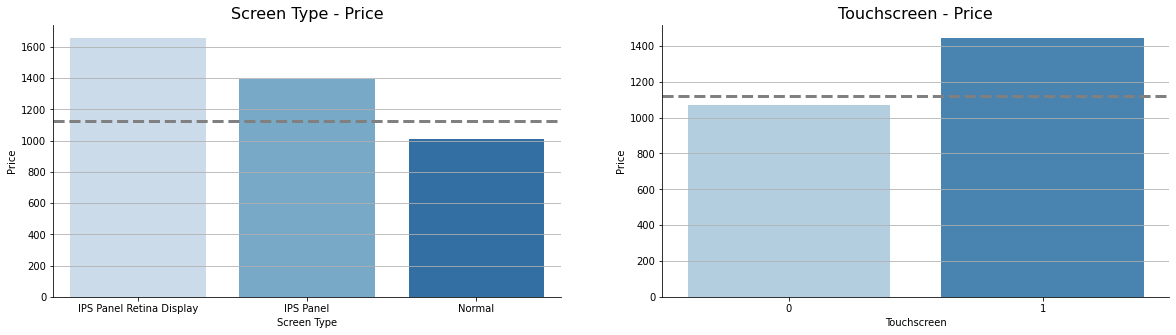

In [51]:
screentype = df.groupby('Screen Type')['Price'].mean().reset_index().sort_values('Price', ascending = False)
touchscreen = df.groupby('Touchscreen')['Price'].mean().reset_index().sort_values('Price', ascending = False)

plt.figure(figsize = (20, 5))

plt.subplot(121)
sns.barplot(x = 'Screen Type', y = 'Price', data = screentype, palette = 'Blues')

plt.title('Screen Type - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')


plt.subplot(122)
sns.barplot(x = 'Touchscreen', y = 'Price', data = touchscreen, palette = 'Blues')

plt.title('Touchscreen - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

Cpu

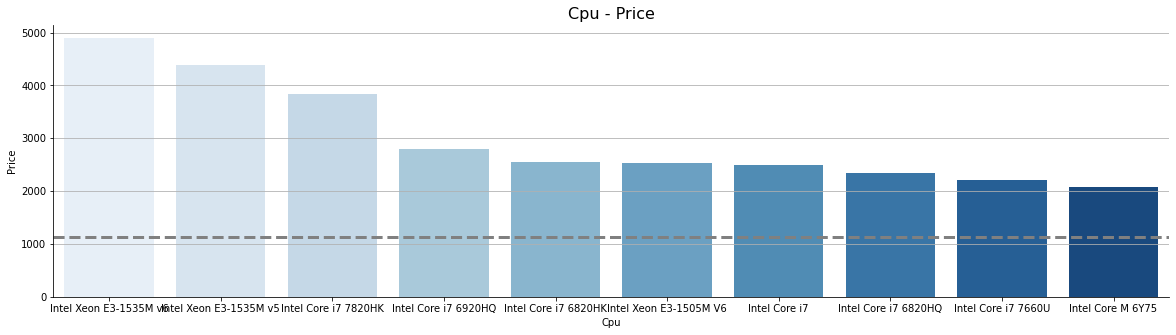

In [58]:
# 상위 10개 값만 확인
cpu = df.groupby('Cpu')['Price'].mean().reset_index().sort_values('Price', ascending = False).head(10)

plt.figure(figsize = (20, 5))
sns.barplot(x = 'Cpu', y = 'Price', data = cpu, palette = 'Blues')

plt.title('Cpu - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

Ram

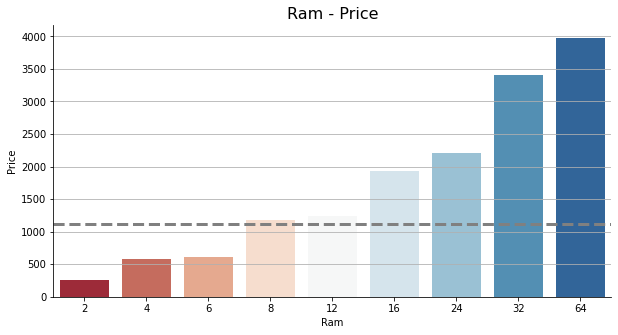

In [53]:
ram = pd.DataFrame(df.groupby('Ram')['Price'].mean()).reset_index().sort_values('Price', ascending = False)

plt.figure(figsize = (10, 5))
sns.barplot(x = 'Ram', y = 'Price', data = ram, palette = 'RdBu')

plt.title('Ram - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

Memory

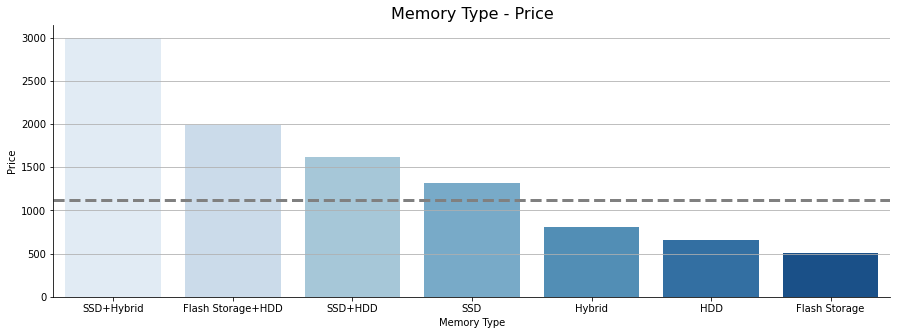

In [54]:
# msize = df.loc[:, ['Memory Size', 'Price']]
# mtype = pd.DataFrame(df.groupby('Memory Type')['Price'].mean()).reset_index().sort_values('Price', ascending = False)

# plt.figure(figsize = (20, 5))
# plt.subplot(121)
# sns.scatterplot(x = 'Memory Size', y = 'Price', data = msize, color = 'yellowgreen')

# plt.title('Memory Size - Price', fontdict = {'fontsize' : 16})
# plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
# plt.gca().spines['right'].set_visible(False) 
# plt.gca().spines['top'].set_visible(False)
# plt.grid(True, axis = 'y')


mtype = pd.DataFrame(df.groupby('Memory Type')['Price'].mean()).reset_index().sort_values('Price', ascending = False)

plt.figure(figsize = (15, 5))
sns.barplot(x = 'Memory Type', y = 'Price', data = mtype, palette = 'Blues')

plt.title('Memory Type - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

Gpu, OpSys, Weight

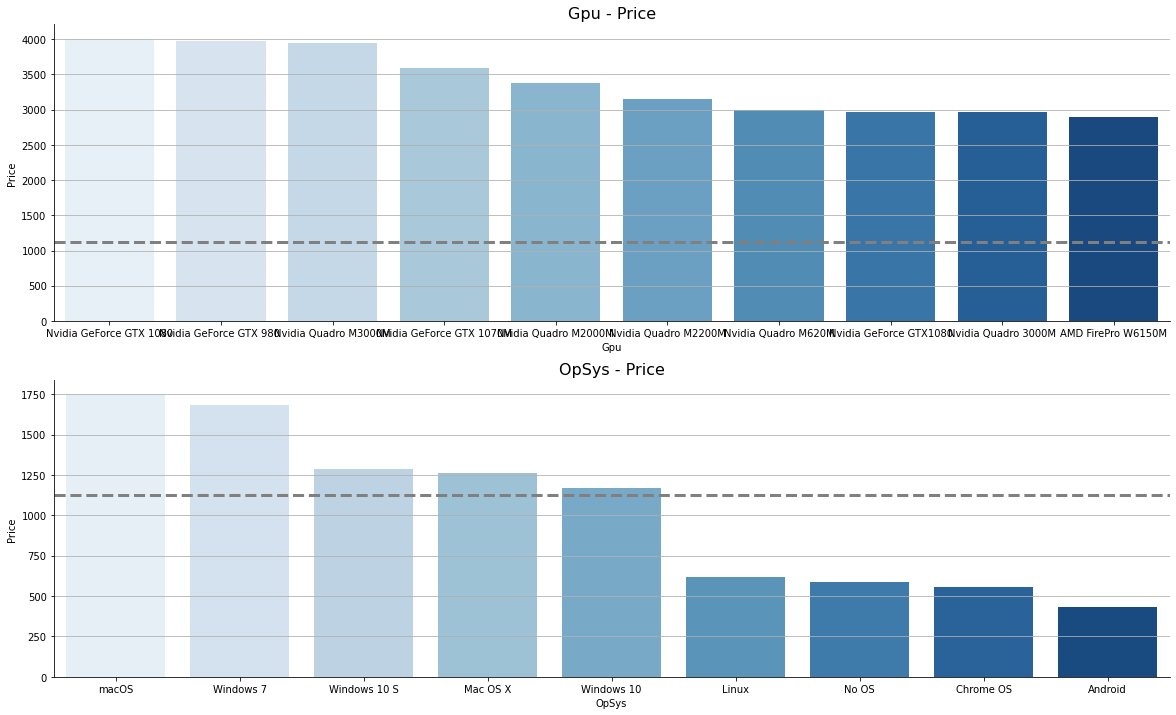

In [59]:
# Gpu는 상위 10개 값만 확인
gpu = pd.DataFrame(df.groupby('Gpu')['Price'].mean()).reset_index().sort_values('Price', ascending = False).head(10)
sys = pd.DataFrame(df.groupby('OpSys')['Price'].mean()).reset_index().sort_values('Price', ascending = False)
weight = df.loc[:, ['Weight', 'Price']]

plt.figure(figsize = (20, 12))

plt.subplot(211)
sns.barplot(x = 'Gpu', y = 'Price', data = gpu, palette = 'Blues')

plt.title('Gpu - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')


plt.subplot(212)
sns.barplot(x = 'OpSys', y = 'Price', data = sys, palette = 'Blues')

plt.title('OpSys - Price', fontdict = {'fontsize' : 16})
plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')


# plt.subplot(223)
# sns.scatterplot(x = 'Weight', y = 'Price', data = weight, color = 'yellowgreen')

# plt.title('Weight - Price', fontdict = {'fontsize' : 16})
# plt.axhline(y = mean, color = 'gray', linestyle = '--', linewidth = 3)
# plt.gca().spines['right'].set_visible(False) 
# plt.gca().spines['top'].set_visible(False)
# plt.grid(True, axis = 'y')

히트맵을 통해 numerical data들의 상관관계 확인

<AxesSubplot:>

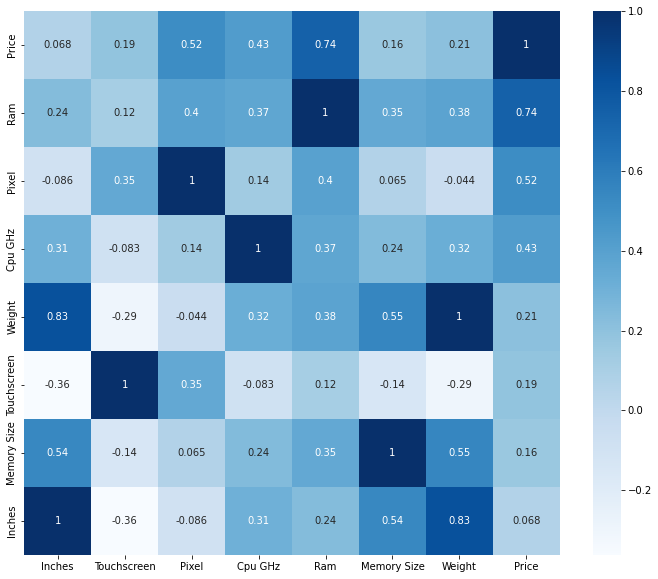

In [60]:
df_corr = df.corr().sort_values('Price', ascending = False)

plt.figure(figsize = (12, 10))
sns.heatmap(df_corr, cbar = True, cmap = 'Blues', annot = True)

# 램과 가격의 상관관계가 높다는 것을 알 수 있음
# 추가적으로 무게와 화면인치수도 상관관계가 높다는 것을 염두에 두고 분석을 진행할 필요가 있다

# 모델 적용

결정 트리, 랜덤 포레스트, xgboost

In [66]:
# feature와 target 분리
X = df.drop(columns = 'Price')
y = df['Price']

In [67]:
# train/test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1042, 14), (261, 14), (1042,), (261,))

범주형 변수 인코딩

In [72]:
from category_encoders import OrdinalEncoder

oe = OrdinalEncoder()
X_train_encoded = oe.fit_transform(X_train)
X_test_encoded = oe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**결정 트리**

In [76]:
# 하이퍼파라미터 튜닝 : max_depth, min_samples_leaf, min_samples_split, max_features

from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

dt = DecisionTreeRegressor(random_state = 10)

dist_dt = {
    'max_depth' : randint(5, 50),
    'min_samples_leaf' : randint(5, 50),
    'max_features' : ['sqrt', 'log2', None]
}

clf1 = RandomizedSearchCV(
    dt,
    param_distributions=dist_dt,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    verbose = 1,
    n_jobs = -1,
    random_state = 2
)

clf1.fit(X_train_encoded, y_train)

print('최적의 파라미터 :', clf1.best_params_)
print('R2 Score :', clf1.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
최적의 파라미터 : {'max_depth': 38, 'max_features': None, 'min_samples_leaf': 8}
R2 Score : 0.7331714222070197


**랜덤 포레스트**

In [77]:
# 하이퍼파라미터 튜닝 : n_estimators, max_depth, min_samples_leaf, max_features

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 10)

dist_rf = {
    'n_estimators' : randint(10, 1000),
    'max_depth' : randint(5, 50),
    'min_samples_leaf' : randint(5, 50),
    'max_features' : ['sqrt', 'log2', None]    
}

clf2 = RandomizedSearchCV(
    rf,
    param_distributions=dist_rf,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    verbose = 1,
    n_jobs = -1,
    random_state = 2
)

clf2.fit(X_train_encoded, y_train)

print('최적의 파라미터 :', clf2.best_params_)
print('R2 Score :', clf2.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
최적의 파라미터 : {'max_depth': 42, 'max_features': None, 'min_samples_leaf': 9, 'n_estimators': 948}
R2 Score : 0.7775162931799635


**xgboost**

In [78]:
# 하이퍼파라미터 튜닝 : n_estimators, max_depth, learning_rate

from xgboost import XGBRegressor

xgb = XGBRegressor(random_state = 10)

dist_xgb = {
    'n_estimators' : randint(10, 1000),
    'max_depth' : randint(5, 50),
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
}

clf3 = RandomizedSearchCV(
    xgb,
    param_distributions=dist_xgb,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    verbose = 1,
    n_jobs = -1,
    random_state = 2    
)

clf3.fit(X_train_encoded, y_train)

print('최적의 파라미터 :', clf3.best_params_)
print('R2 Score :', clf3.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[05:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최적의 파라미터 : {'learning_rate': 0.1, 'max_depth': 27, 'n_estimators': 770}
R2 Score : 0.8233090328577651


**모델 선택**

test set에 대한 R2 score 확인

In [79]:
print('결정 트리의 R2 Score :', round(clf1.best_estimator_.score(X_test_encoded, y_test), 4))
print('랜덤 포레스트의 의 R2 Score :', round(clf2.best_estimator_.score(X_test_encoded, y_test), 4))
print('xgboost의 R2 Score :', round(clf3.best_estimator_.score(X_test_encoded, y_test), 4))

# XGBoost가 가장 강력한 성능을 보이므로 모델로 선택
model = clf3.best_estimator_

결정 트리의 R2 Score : 0.6819
랜덤 포레스트의 의 R2 Score : 0.7391
xgboost의 R2 Score : 0.8145


# 모델 해석

permutation importance 확인

In [80]:
import eli5

from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring = 'r2',
    n_iter = 10,
    random_state = 2
)

permuter.fit(X_test_encoded, y_test)

pi = pd.DataFrame({'feature' : X_test_encoded.columns,
                   'importance' : permuter.feature_importances_}).sort_values('importance', ascending = False)

pi

,feature,importance
8,Ram,0.563999
7,Cpu GHz,0.163911
1,TypeName,0.073353
13,Weight,0.054234
5,Pixel,0.048763
11,Gpu,0.036055
0,Company,0.029649
10,Memory Type,0.025669
6,Cpu,0.025483
2,Inches,0.021780


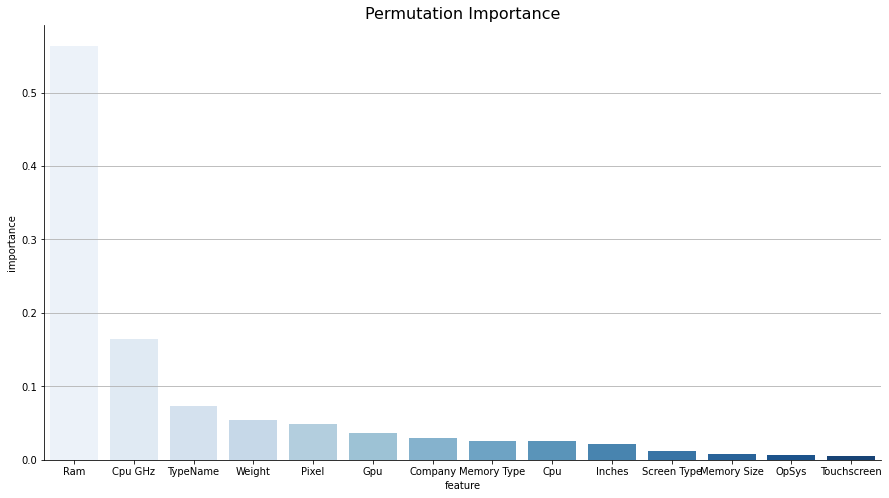

In [81]:
# 시각화를 통해 확인

plt.figure(figsize = (15, 8))
sns.barplot(x = 'feature', y = 'importance', data = pi, palette = 'Blues')

plt.title('Permutation Importance', fontdict = {'fontsize' : 16})
plt.gca().spines['right'].set_visible(False) 
plt.gca().spines['top'].set_visible(False)
plt.grid(True, axis = 'y')

**PDP Plot**

Permuation Importance가 높은 Ram과 Cpu GHz의 PDP Plot을 확인

In [83]:
plt.rcParams['figure.dpi'] = 70

(<Figure size 1050x665 with 2 Axes>,
 {'pdp_ax': <AxesSubplot:xlabel='Ram'>, 'title_ax': <AxesSubplot:>})

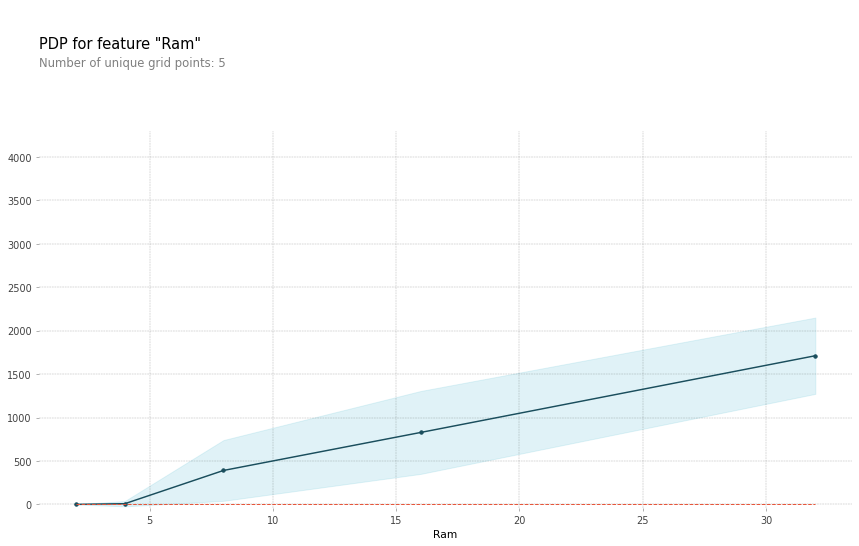

In [84]:
import warnings
warnings.filterwarnings('ignore')

from pdpbox.pdp import pdp_isolate, pdp_plot

# Ram
isolate_ram = pdp_isolate(
    model = model,
    dataset = X_test_encoded,
    model_features = X_test_encoded.columns,
    feature = 'Ram',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(isolate_ram, feature_name = 'Ram')

(<Figure size 1050x665 with 2 Axes>,
 {'pdp_ax': <AxesSubplot:xlabel='Cpu GHz'>, 'title_ax': <AxesSubplot:>})

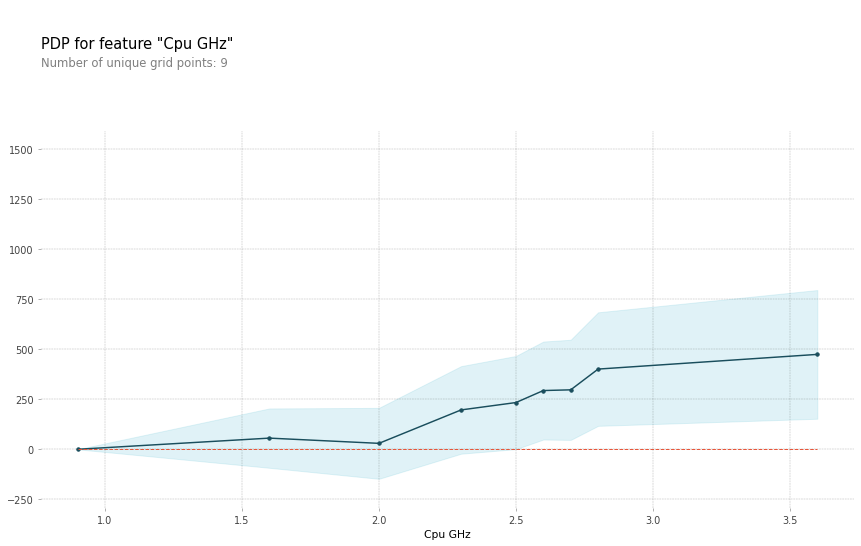

In [85]:
# Cpu GHz
isolate_cpu = pdp_isolate(
    model = model,
    dataset = X_test_encoded,
    model_features = X_test_encoded.columns,
    feature = 'Cpu GHz',
    grid_type = 'percentile',
    num_grid_points = 10
)

pdp_plot(isolate_cpu, feature_name = 'Cpu GHz')

2특성으로도 확인

(<Figure size 525x665 with 3 Axes>,
 {'pdp_inter_ax': <AxesSubplot:xlabel='Ram', ylabel='Cpu GHz'>,
  'title_ax': <AxesSubplot:>})

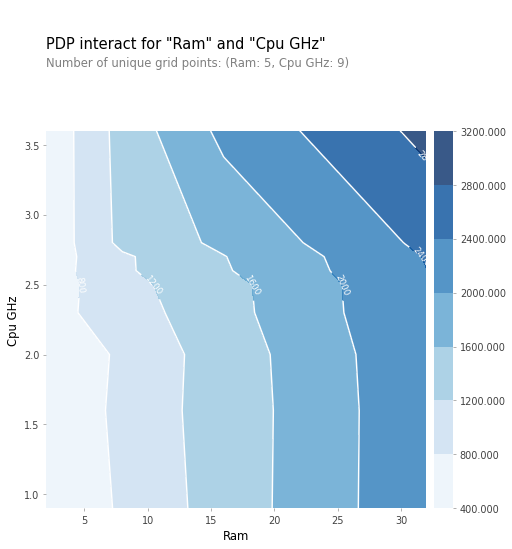

In [86]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Ram', 'Cpu GHz']

interaction = pdp_interact(
    model = model,
    dataset = X_test_encoded,
    model_features = X_test_encoded.columns,
    features = features
)

pdp_interact_plot(
    interaction,
    plot_type = 'contour',
    feature_names = features,
    plot_params = {'cmap' : 'Blues'}
)

# Shap

force plot을 통해 램 16 이상, 메모리 256 이상인 데이터들에 대해서 확인

In [87]:
import shap

data = X_test_encoded[(X_test_encoded['Ram'] >= 16) & (X_test_encoded['Memory Size'] >= 256)]
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value, 
    shap_values = shap_values,
    features = data
)

# Ram이 압도적으로 가격을 올리는 요소라고 볼 수 있다